## Observations and Insights 

In [2]:
# Dependencies and Setup
import matplotlib.pyplot as plt
import pandas as pd
import scipy.stats as st

# Study data files
mouse_metadata_path = "data/Mouse_metadata.csv"
study_results_path = "data/Study_results.csv"

# Read the mouse data and the study results
mouse_metadata = pd.read_csv(mouse_metadata_path)
study_results = pd.read_csv(study_results_path)

# Combine the data into a single dataset
merge_data_df = pd.merge(study_results,mouse_metadata, on="Mouse ID")

# Display the data table for preview
merge_data_df.head()

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,b128,0,45.000000,0,Capomulin,Female,9,22
1,b128,5,45.651331,0,Capomulin,Female,9,22
2,b128,10,43.270852,0,Capomulin,Female,9,22
3,b128,15,43.784893,0,Capomulin,Female,9,22
4,b128,20,42.731552,0,Capomulin,Female,9,22


In [7]:
# Checking the number of mice.
merge_data_df["Mouse ID"].value_counts().count()

249

In [46]:
# Getting the duplicate mice by ID number that shows up for Mouse ID and Timepoint. 

# Function .duplicated() helps us to find duplicate
duplicates_last_values = merge_data_df.duplicated(['Mouse ID','Timepoint'])

# DataFrame of dupicates provides: Mouse ID and repeated Time
df_duplicates = pd.DataFrame({"Mouse ID": show_duplicate["Mouse ID"],
                              "Timepoint": show_duplicate["Timepoint"]})
df_duplicates


,Mouse ID,Timepoint
861,g989,0
863,g989,5
865,g989,10
867,g989,15
869,g989,20


In [47]:
# Optional: Get all the data for the duplicate mouse ID.
all_duplicates = pd.concat(g for _, g in merge_data_df.groupby(['Mouse ID','Timepoint']) if len(g) > 1)
all_duplicates

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
860,g989,0,45.000000,0,Propriva,Female,21,26
861,g989,0,45.000000,0,Propriva,Female,21,26
862,g989,5,48.786801,0,Propriva,Female,21,26
863,g989,5,47.570392,0,Propriva,Female,21,26
864,g989,10,51.745156,0,Propriva,Female,21,26
865,g989,10,49.880528,0,Propriva,Female,21,26
866,g989,15,51.325852,1,Propriva,Female,21,26
867,g989,15,53.442020,0,Propriva,Female,21,26
868,g989,20,55.326122,1,Propriva,Female,21,26
869,g989,20,54.657650,1,Propriva,Female,21,26


In [80]:
#Average 
group_average_duplicates = merge_data_df.groupby(['Mouse ID','Timepoint'])['Tumor Volume (mm3)'].mean()#.mean()
#mean_time = group['Tumor Volume (mm3)'].mean()
#group.to_csv("group.csv", index=False, header=True)
#mean_time
group_average_duplicates

#clear_avrg_df = pd.DataFrame({"Total Count": mean_time})

#clear_avrg_df.count()

#clear_avrg_df["Mouse ID"].count()

Mouse ID  Timepoint
a203      0            45.000000
          5            48.508468
          10           51.852437
          15           52.777870
          20           55.173336
          25           56.793208
          30           59.523197
          35           61.931650
          40           63.593490
          45           67.973419
a251      0            45.000000
          5            46.982127
          10           48.591179
          15           50.534456
          20           54.462594
          25           57.414646
          30           59.861241
          35           60.903885
          40           63.095076
          45           65.525743
a262      0            45.000000
          5            48.717568
          10           49.595181
          15           53.827974
          20           57.013313
          25           60.131862
          30           64.958092
          35           66.561963
          40           69.592732
          45           

In [48]:
# Create a clean DataFrame by dropping the duplicate mouse by its ID.
remove_duplicates_df = merge_data_df.drop_duplicates(subset=['Mouse ID','Timepoint'], keep='last')


In [49]:
# Checking the number of mice in the clean DataFrame.
remove_duplicates_df["Mouse ID"].value_counts().count()

249

## Summary Statistics

In [113]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen

# Use groupby and summary statistical methods to calculate the following properties of each drug regimen: 
# mean, median, variance, standard deviation, and SEM of the tumor volume.

group_by_regimen = remove_duplicates_df.groupby(["Drug Regimen"])

mean_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].mean()

median_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].median()

var_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].var()

std_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].std()

sem_tv_by_regimen = group_by_regimen["Tumor Volume (mm3)"].sem()

# Assemble the resulting series into a single summary dataframe.

summary_statistics_df = pd.DataFrame({"Mean": mean_tv_by_regimen, 
                                      "Median": median_tv_by_regimen,
                                      "Variance": var_tv_by_regimen,
                                      "STD": std_tv_by_regimen,
                                     "SEM": sem_tv_by_regimen})
summary_statistics_df



,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


In [115]:
# Generate a summary statistics table of mean, median, variance, standard deviation, and SEM of the tumor volume for each regimen
# Using the aggregation method, produce the same summary statistics in a single line

summary_statistics_agg = group_by_regimen["Tumor Volume (mm3)"].agg(Mean="mean", Median="median",Variance="var",STD="std", SEM="sem")
summary_statistics_agg

,Mean,Median,Variance,STD,SEM
Drug Regimen,,,,,
Capomulin,40.675741,41.557809,24.947764,4.994774,0.329346
Ceftamin,52.591172,51.776157,39.290177,6.268188,0.469821
Infubinol,52.884795,51.820584,43.128684,6.567243,0.492236
Ketapril,55.235638,53.698743,68.553577,8.279709,0.603860
Naftisol,54.331565,52.509285,66.173479,8.134708,0.596466
Placebo,54.033581,52.288934,61.168083,7.821003,0.581331
Propriva,52.382993,50.783528,43.220205,6.574208,0.526358
Ramicane,40.216745,40.673236,23.486704,4.846308,0.320955
Stelasyn,54.233149,52.431737,59.450562,7.710419,0.573111


## Bar and Pie Charts

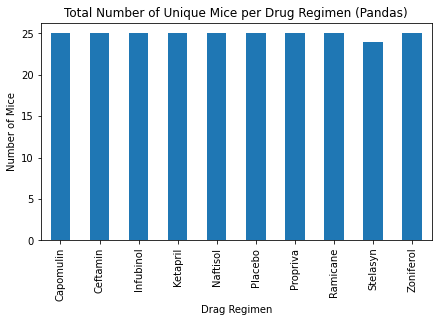

<Figure size 432x288 with 0 Axes>

In [187]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pandas.
num_mice_pandas = group_by_regimen.nunique()["Mouse ID"].plot(kind="bar", figsize=(7,4), title="Total Number of Unique Mice per Drug Regimen (Pandas)")

num_mice_pandas.set_xlabel("Drag Regimen")
num_mice_pandas.set_ylabel("Number of Mice")

plt.show()
plt.tight_layout()



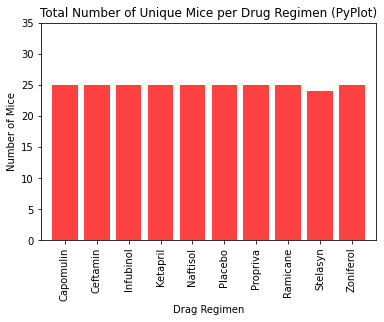

In [131]:
# Generate a bar plot showing the total number of unique mice tested on each drug regimen using pyplot.

x_axis = summary_statistics_agg.index
y_axis = group_by_regimen.nunique()["Mouse ID"]

plt.title("Total Number of Unique Mice per Drug Regimen (PyPlot)")
plt.xlabel("Drag Regimen")
plt.ylabel("Number of Mice")
plt.xlim(-0.75, len(x_axis)-.25)
plt.ylim(0, max(y_axis) + 10)
#tick_locations = [value+0.5 for value in x_axis]

plt.bar(x_axis, y_axis, facecolor="red", alpha=0.75, align="center")
plt.xticks(x_axis, rotation="vertical")
plt.show()


Sex
Female    124
Male      125
Name: Mouse ID, dtype: int64


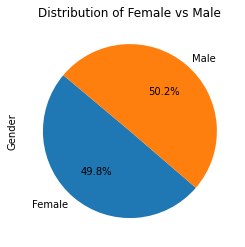

In [188]:
# Generate a pie plot showing the distribution of female versus male mice using pandas

group_by_sex = remove_duplicates_df.groupby(["Sex"])

# Counting Players by Gender
gender_count = group_by_sex.nunique()["Mouse ID"]
print(gender_count)

gender_pie = gender_count.plot(kind="pie",  figsize=(7,4), autopct="%1.1f%%", startangle=140, title = "Distribution of Female vs Male")
gender_pie.set_ylabel("Gender")

plt.show()



([<matplotlib.patches.Wedge at 0x2a8ba8f8b70>,
 [Text(-0.7771287477781476, -0.9143691319028482, 'Female'),
  Text(0.7123680187966355, 0.8381717042442776, 'Male')],
 [Text(-0.4533251028705861, -0.5333819936099948, '49.8%'),
  Text(0.38856437388907383, 0.4571845659514241, '50.2%')])

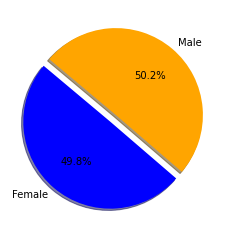

In [183]:
# Generate a pie plot showing the distribution of female versus male mice using pyplot
#gender = ["Female", "Male"]

# The values of each section of the pie chart

# The colors of each section of the pie chart
colors = ["blue", "orange"]

# Tells matplotlib to seperate the "Humans" section from the others
explode = (0.1, 0)

plt.pie(gender_count, explode=explode, labels=gender, colors=colors,
        autopct="%1.1f%%", shadow=True, startangle=140)

## Quartiles, Outliers and Boxplots

In [341]:
# Calculate the final tumor volume of each mouse across four of the treatment regimens:  
# Capomulin, Ramicane, Infubinol, and Ceftamin

# Start by getting the last (greatest) timepoint for each mouse
group_by = remove_duplicates_df.groupby(["Mouse ID"])
max_timepoint = group_by["Timepoint"].max()

#Conver max_timepoint to DataFrame
df_max_timepoint = pd.DataFrame({"Timepoint": max_timepoint})
#df_max_timepoint
#print(max_timepoint)

# Merge this group df with the original dataframe to get the tumor volume at the last timepoint
merge_max_timepoint = pd.merge(max_timepoint,remove_duplicates_df, on=["Mouse ID", "Timepoint"])
merge_max_timepoint

#Group by treatment regimens:
#group_by_treatment = merge_max_timepoint.groupby(["Drug Regimen"])
#group_by_treatment["Tumor Volume (mm3)"].value_counts()

#only_Capomulin_Ramicane_Infubinol_Ceftamin = merge_max_timepoint.loc[(merge_max_timepoint["Drug Regimen"] == "Capomulin") | (
#   merge_max_timepoint["Drug Regimen"] == "Ramicane") | (merge_max_timepoint["Drug Regimen"] == "Infubinol") | (
#   merge_max_timepoint["Drug Regimen"] == "Ceftamin"), ["Drug Regimen","Mouse ID","Tumor Volume (mm3)"]]

#only_Capomulin_Ramicane_Infubinol_Ceftamin.sort_values("Drug Regimen")
#only_Capomulin_Ramicane_Infubinol_Ceftamin.count()

#print(merge_max_timepoint.iloc[0,2])

,Mouse ID,Timepoint,Tumor Volume (mm3),Metastatic Sites,Drug Regimen,Sex,Age_months,Weight (g)
0,a203,45,67.973419,2,Infubinol,Female,20,23
1,a251,45,65.525743,1,Infubinol,Female,21,25
2,a262,45,70.717621,4,Placebo,Female,17,29
3,a275,45,62.999356,3,Ceftamin,Female,20,28
4,a366,30,63.440686,1,Stelasyn,Female,16,29
5,a401,45,66.794156,4,Zoniferol,Female,8,25
6,a411,45,38.407618,1,Ramicane,Male,3,22
7,a444,45,43.047543,0,Ramicane,Female,10,25
8,a457,10,49.783419,0,Ketapril,Female,11,30
9,a492,45,60.122011,1,Stelasyn,Male,20,25


In [345]:
# Put treatments into a list for for loop (and later for plot labels)
treatments = ["Capomulin", "Ramicane", "Infubinol", "Ceftamin"]

# Create empty list to fill with tumor vol data (for plotting)

selected_drugs_df = pd.DataFrame() #DataFrame of the tumor volume of each mouse across four of the treatment regimens
outliers_df = pd.DataFrame()

# Calculate the IQR and quantitatively determine if there are any potential outliers. 
    
    # Locate the rows which contain mice on each drug and get the tumor volumes
for drug in treatments:
    tumor_vol = []
    for x in range(len(merge_max_timepoint)):
        #print(x)
        if merge_max_timepoint.iloc[x,4] == drug:
            tumor_vol.append(merge_max_timepoint.iloc[x,2])
        else:
            pass
        
    #tumor_vol = sorted(tumor_vol) #sorting values descedent way. Wil need it to do BoxPlot
       
    # add subset: DataFrame of the tumor volume of each mouse across four of the treatment regimens   
    selected_drugs_df[drug] = tumor_vol
    #print(selected_drugs_df)
    
    # Determine outliers using upper and lower bounds
    quartiles = selected_drugs_df[drug].quantile([.25,.5,.75])
    print(drug)
    print(f"Quartile 25 : {quartiles[0.25]}")
    print(f"Quartile 50 : {quartiles[0.5]}")
    print(f"Quartile 75 : {quartiles[0.75]}")
    lowerq = quartiles[0.25]
    upperq = quartiles[0.75]
    iqr = upperq-lowerq
    print(f"IQR : {iqr}")
    
    lower_bound = lowerq - (1.5*iqr)
    upper_bound = upperq + (1.5*iqr)    
    print(f"Lower_boundary {lower_bound}")
    
    new_row = ({"Treatment": drug, "Lower Outlier" : lower_bound, "Upper Outlier": upper_bound})
    outliers_df = outliers_df.append(new_row, ignore_index=True)
   
outliers_df = outliers_df[["Treatment", "Lower Outlier", "Upper Outlier"]]
print(outliers_df)

selected_drugs_df


Capomulin
Quartile 25 : 32.37735684
Quartile 50 : 38.125164399999996
Quartile 75 : 40.1592203
IQR : 7.781863460000004
Lower_boundary 20.70456164999999
Ramicane
Quartile 25 : 31.56046955
Quartile 50 : 36.56165229
Quartile 75 : 40.65900627
IQR : 9.098536719999998
Lower_boundary 17.912664470000003
Infubinol
Quartile 25 : 54.04860769
Quartile 50 : 60.16518046
Quartile 75 : 65.52574285
IQR : 11.477135160000003
Lower_boundary 36.83290494999999
Ceftamin
Quartile 25 : 48.72207785
Quartile 50 : 59.85195552
Quartile 75 : 64.29983003
IQR : 15.577752179999997
Lower_boundary 25.355449580000002
   Treatment  Lower Outlier  Upper Outlier
0  Capomulin      20.704562      51.832015
1   Ramicane      17.912664      54.306811
2  Infubinol      36.832905      82.741446
3   Ceftamin      25.355450      87.666458


,Capomulin,Ramicane,Infubinol,Ceftamin
0,38.982878,38.407618,67.973419,62.999356
1,38.939633,43.047543,65.525743,45.000000
2,30.485985,38.810366,57.031862,56.057749
3,37.074024,32.978522,66.083066,55.742829
4,40.159220,38.342008,72.226731,48.722078
5,47.685963,33.397653,36.321346,47.784682
6,37.311846,37.311236,60.969711,61.849023
7,38.125164,40.659006,62.435404,68.923185
8,38.753265,29.128472,60.918767,67.748662
9,41.483008,33.562402,67.289621,57.918381


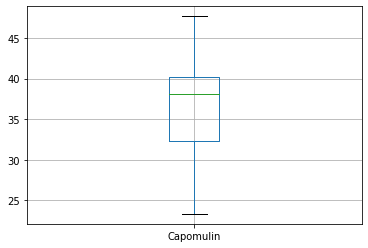

In [454]:
# Generate a box plot of the final tumor volume of each mouse across four regimens of interest
#print(selected_drugs_df)



#box_axis = [23.343598, 28.430964, 28.484033, 30.485985,31.023923,31.896238,32.377357,33.329098,34.455298,36.041047,37.074024,37.311846, 38.125164,38.753265, 38.846876, 38.939633, 38.982878,39.952347,40.15922,40.658124,40.728578,41.483008,41.581521,46.539206,47.685963]
#box_axis

#boxplot = plt.boxplot(box_axis)#, autorange = True)#, whis =(0,100))

boxplot = selected_drugs_df.boxplot(column=["Capomulin"], whis=1.5)
#plt.show()
#x = selected_drugs_df["Capomulin"]



## Line and Scatter Plots

Text(0.5, 1.0, 'Line plot of tumor volume vs. time point per Mouse')

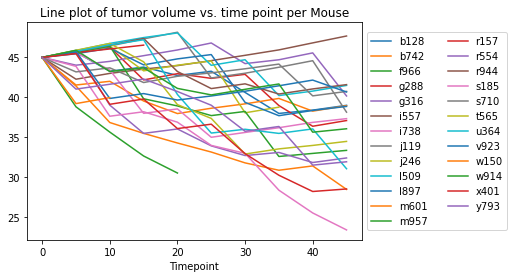

In [373]:
# Generate a line plot of tumor volume vs. time point for a mouse treated with Capomulin

# Plots for all Mice (Multiple Plots).
only_Capomulin = remove_duplicates_df.loc[(remove_duplicates_df["Drug Regimen"] == "Capomulin"), ["Mouse ID","Drug Regimen","Timepoint","Tumor Volume (mm3)","Weight (g)"]]

only_Capomulin.set_index('Timepoint', inplace=True)
only_Capomulin.groupby(['Mouse ID'])['Tumor Volume (mm3)'].plot(legend=True)
plt.legend(ncol=2, loc='center left', bbox_to_anchor=(1, 0.5))

plt.title("Line plot of tumor volume vs. time point per Mouse")


In [ ]:
#plt.scatter(who_data.iloc[:,3],who_data.iloc[:,10])

            average tumor volume
Weight (g)                      
15                     36.182040
17                     37.214133
19                     41.182391
20                     39.141053
21                     42.088700
22                     43.288490
23                     43.341051
24                     44.805810
25                     44.062109


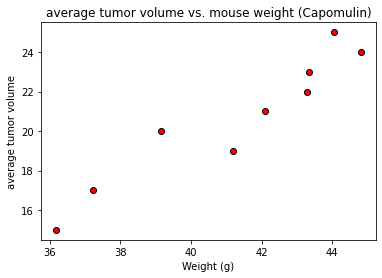

In [384]:
# Generate a scatter plot of average tumor volume vs. mouse weight for the Capomulin regimen
group_by_weight = only_Capomulin.groupby(["Weight (g)"])

tumor_avr = group_by_weight["Tumor Volume (mm3)"].mean()

tumor_avr_df = pd.DataFrame({"average tumor volume": tumor_avr})
print(tumor_avr_df)

y_axis = tumor_avr_df.index
x_axis = tumor_avr_df["average tumor volume"]

plt.title("average tumor volume vs. mouse weight (Capomulin)")
plt.ylabel("average tumor volume")
plt.xlabel("Weight (g)")


plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")



## Correlation and Regression

The correlation between average tumor volume and mouse weight is 0.95


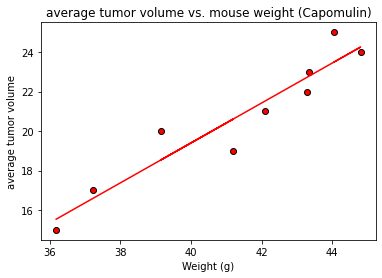

In [426]:
# Calculate the correlation coefficient and linear regression model 
# for mouse weight and average tumor volume for the Capomulin regimen

#print(tumor_avr_df)

#Correlation Coeff.

x_axis = tumor_avr_df["average tumor volume"]
y_axis = tumor_avr_df.index

correlation = st.pearsonr(x_axis,y_axis)
print(f"The correlation between average tumor volume and mouse weight is {round(correlation[0],2)}")

#Regression

from scipy.stats import linregress

x_axis = tumor_avr_df["average tumor volume"]
y_axis = tumor_avr_df.index

(slope, intercept, rvalue, pvalue, stderr) = linregress(x_axis, y_axis)
regress_values = x_axis * slope + intercept
line_eq = "y = " + str(round(slope,2)) + "x + " + str(round(intercept,2))

plt.scatter(x_axis, y_axis, marker="o", facecolors="red", edgecolors="black")
plt.plot(x_axis,regress_values,"r-")
#plt.annotate(line_eq,(0,0),fontsize=15,color="red")
plt.title("average tumor volume vs. mouse weight (Capomulin)")
plt.ylabel("average tumor volume")
plt.xlabel("Weight (g)")

plt.show()